# Notebook d'analyse exploratoire

In [1]:
# Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

#%matplotlib tk

In [2]:
fn = "../data_cleaning/mydf.csv"
df = pd.read_csv(fn, delimiter = '\t', encoding='utf8',quoting=True)
print(df.columns)

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutriscore_grade'],
      dtype='object')


## Analyse univariée

In [3]:
palette = {'a':'darkgreen', 'b':'limegreen', 'c':'gold', 'd':'darkorange', 'e':'orangered'}

Text(0.5, 1.0, 'Part des produits selon le grade nutriscore')

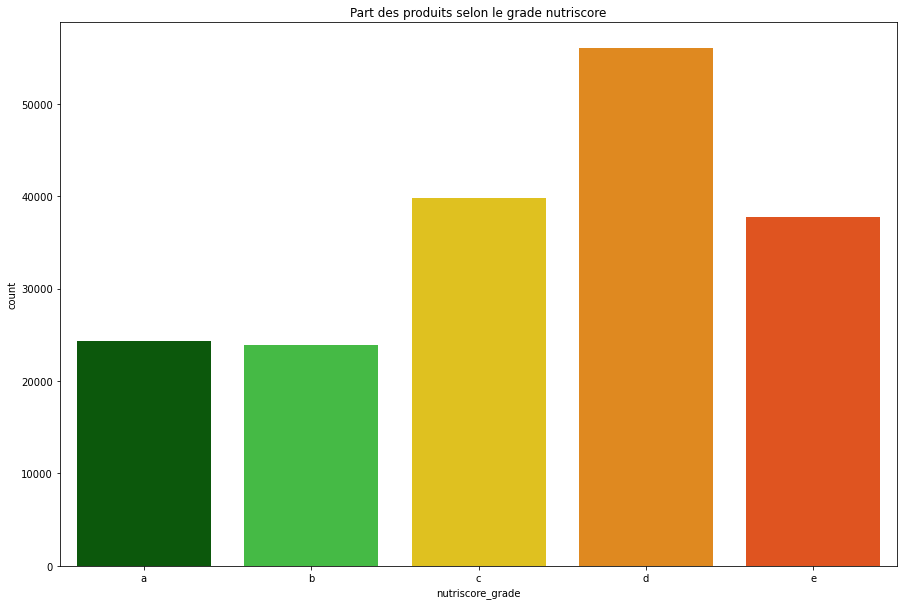

In [4]:
plt.figure(figsize=(15,10))
sns.countplot(x="nutriscore_grade", data=df, order=['a','b','c','d','e'], palette=palette).set_title("Part des produits selon le grade nutriscore")

Nous observons que les produits avec un bon nutriscore sont moins nombreux que ceux avec un mauvais nutriscore.

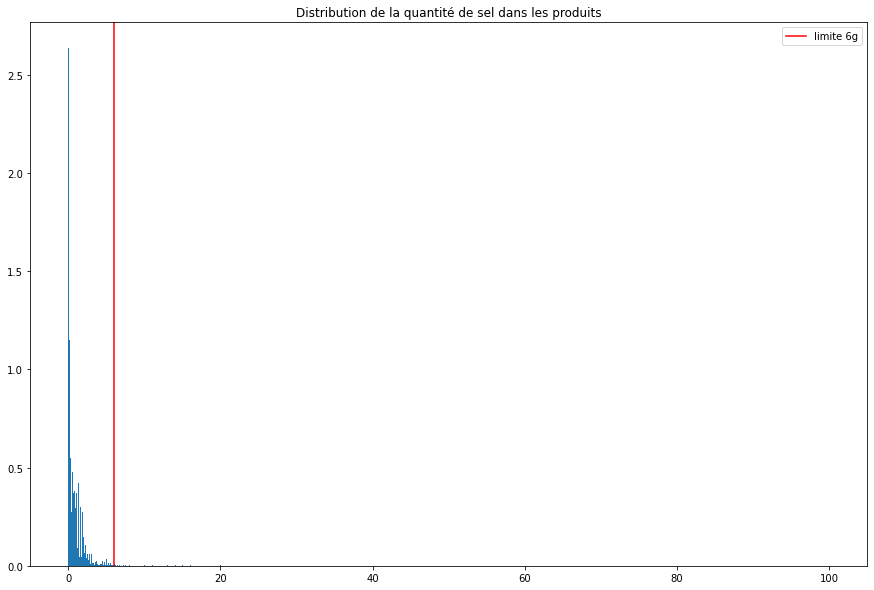

In [5]:
plt.figure(figsize=(15,10))
_ = plt.hist(df['salt_100g'],bins=1000,density=True)
plt.axvline(6,color='red',label='limite 6g')
plt.title('Distribution de la quantité de sel dans les produits')
plt.legend()

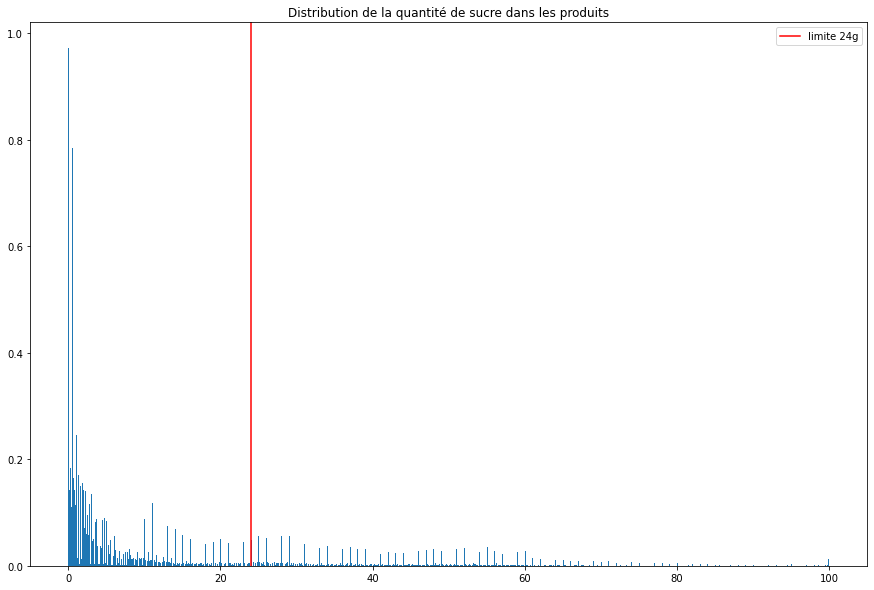

In [6]:
plt.figure(figsize=(15,10))
_ = plt.hist(df['sugars_100g'],bins=1000,density=True)
plt.axvline(24,color='red',label='limite 24g')
plt.title('Distribution de la quantité de sucre dans les produits')
plt.legend()

Visuellement, les produits ont une quantité de sel inférieur à la quantité limite journalière recommandée à ne pas dépasser pour un utilisateur souffrant d'hypertension qui est de 6g. Les mêmes observations peuvent être faites pour le sucre, avec une limite de 24g.
source : 
* http://centre-hypertension.org/hypertension-et-alimentation-limiter-ses-apports-en-sel/
* https://www.creapharma.ch/news/quantite-sucre-depasser-jour.htm

## Analyse multivariée

* ### Analyse bivariée

Text(0.5, 1.0, "Repartition des valeurs de l'energie en fonction du nutriscore")

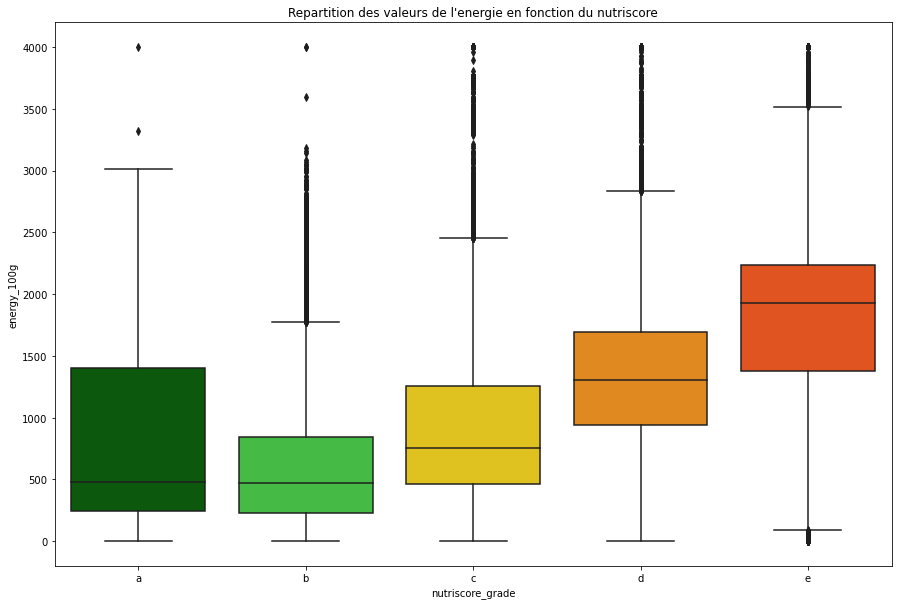

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'energy_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de l\'energie en fonction du nutriscore')
#sns.histplot(ax=axes[0], data=df['energy_100g'], stat='density').set_title('energy_100g')

Globalement, on peut observer que moins le nutriscore est bon, plus l'apport énergétique est élevé.

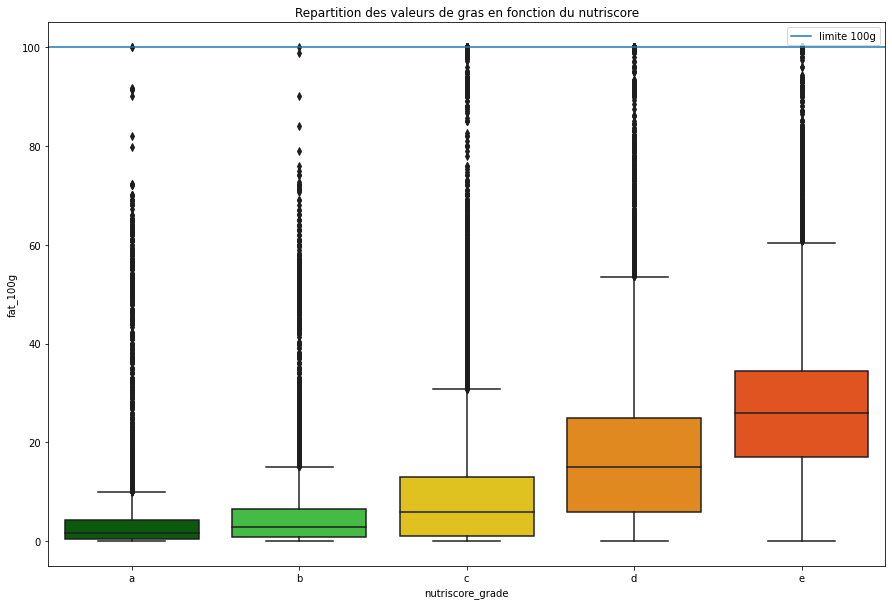

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'fat_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de gras en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

Globalement on peut observer que plus un produit est gras plus son nutriscore est mauvais.

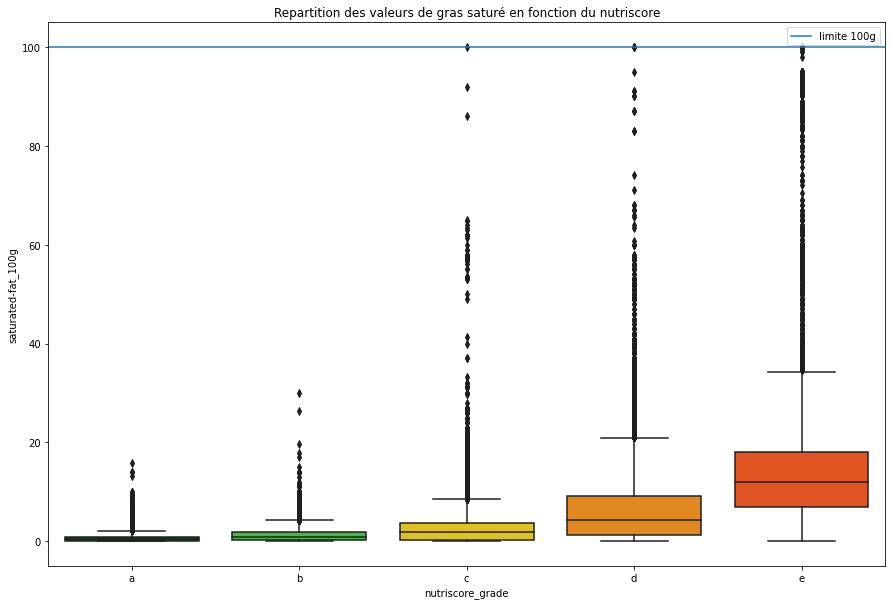

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'saturated-fat_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de gras saturé en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

La même observation peut être faite avec les gras saturés

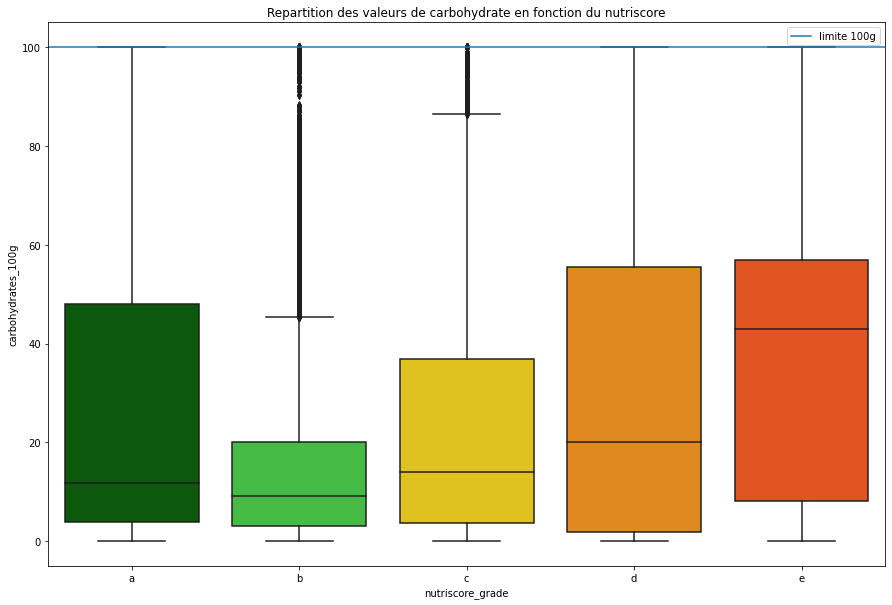

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'carbohydrates_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de carbohydrate en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

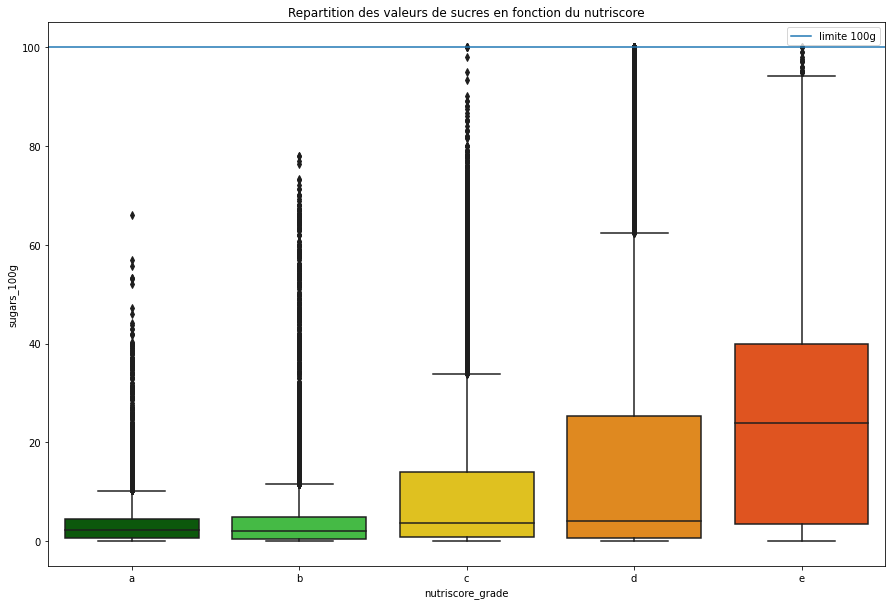

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'sugars_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de sucres en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

On peut observer que plus un produit contient du sucre, plus son nutriscore est mauvais.

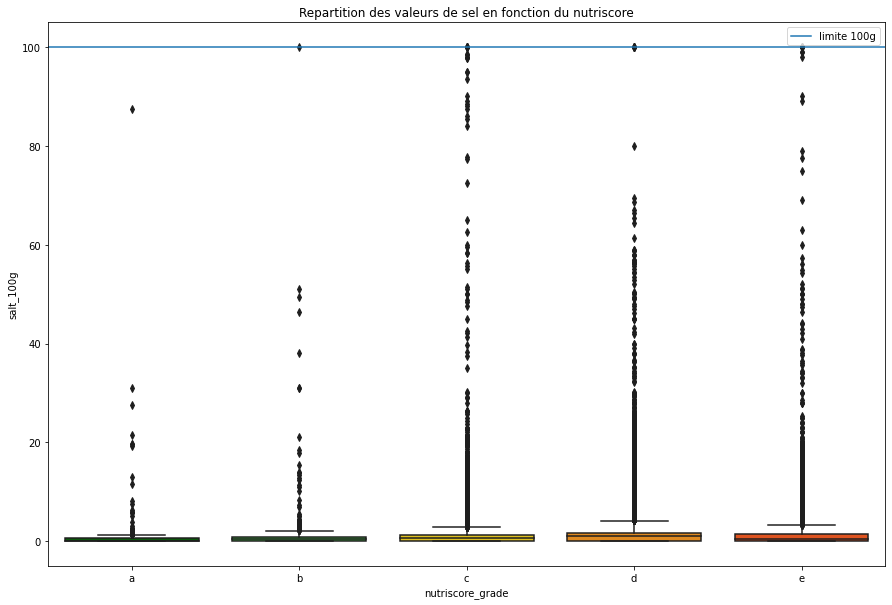

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'salt_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de sel en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

C'est difficile à observer car les valeurs de la colonne <code>sel</code> sont en général trés petites et que les quelques grandes valeurs écrasent la globalité des autres valeurs, mais on peut observer que plus un produit contient du sel plus son nutriscore est mauvais.

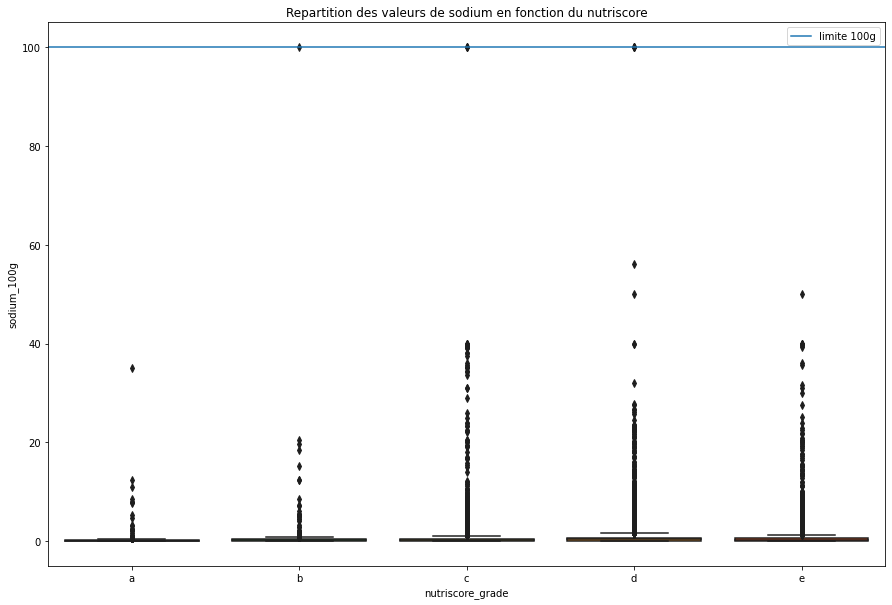

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'sodium_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de sodium en fonction du nutriscore')
plt.axhline(100,label='limite 100g')
plt.legend()

Text(0.5, 1.0, 'Repartition des valeurs de nutriscore en fonction du grade nutriscore')

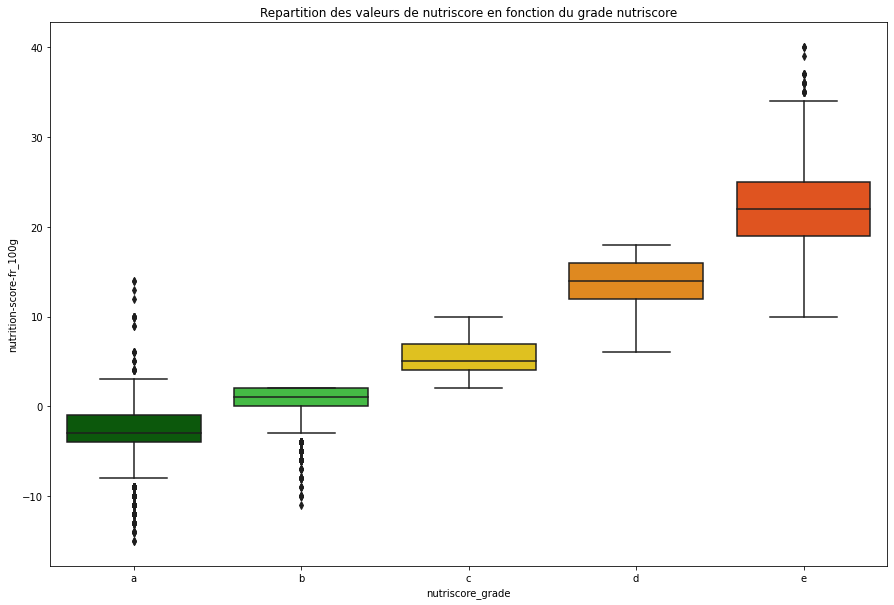

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='nutriscore_grade', y = 'nutrition-score-fr_100g', order=['a','b','c','d','e'], data=df ,palette=palette).set_title('Repartition des valeurs de nutriscore en fonction du grade nutriscore')

L'aspect de ceschéma est assez naturel et renvoit bien à la définition du nutriscore.

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

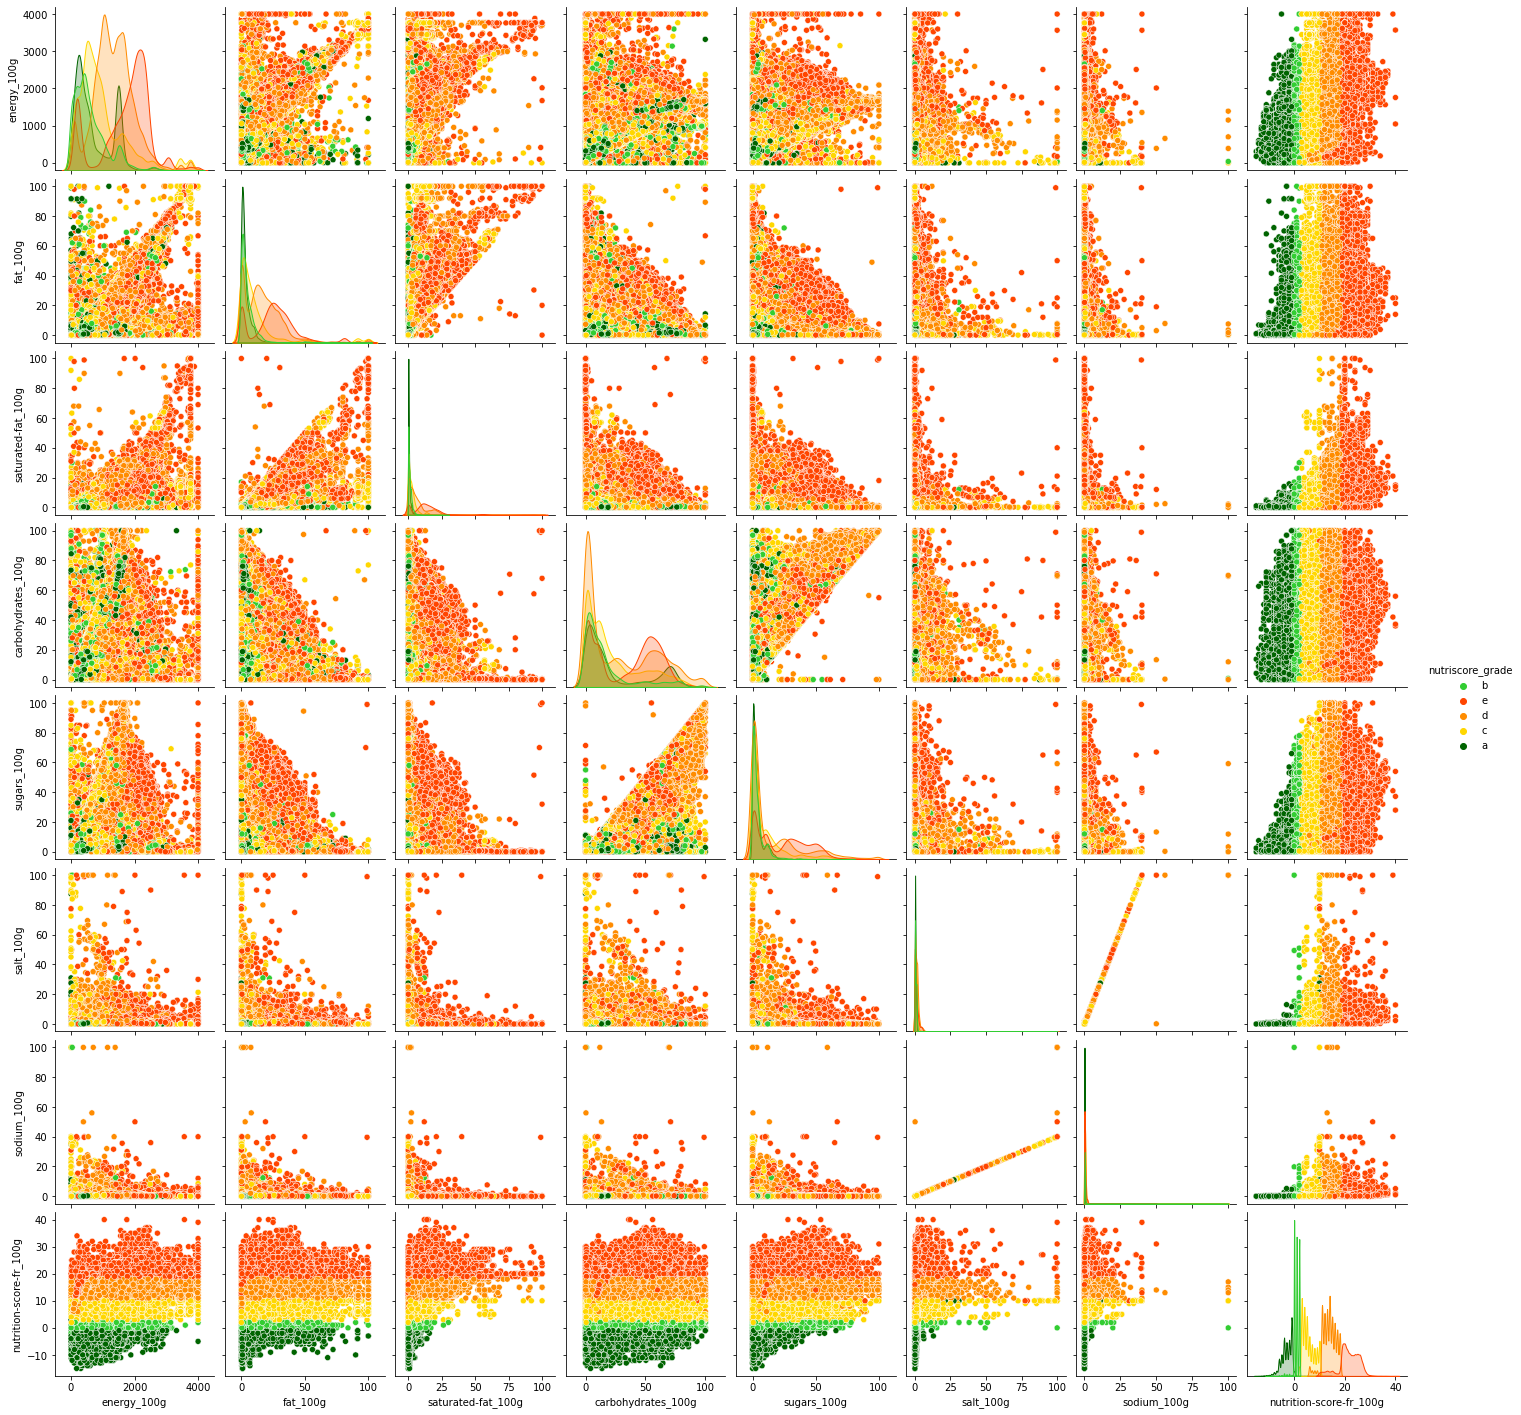

In [15]:
%matplotlib inline 
sns.pairplot(df, hue="nutriscore_grade", palette = palette)
plt.yticks(rotation=90)

In [16]:
cols = df.columns
quants = [c for c in df.columns[:-1]] # colonnes quantitatives

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'energy_100g'),
  Text(1.5, 0, 'fat_100g'),
  Text(2.5, 0, 'saturated-fat_100g'),
  Text(3.5, 0, 'carbohydrates_100g'),
  Text(4.5, 0, 'sugars_100g'),
  Text(5.5, 0, 'salt_100g'),
  Text(6.5, 0, 'sodium_100g'),
  Text(7.5, 0, 'nutrition-score-fr_100g')])

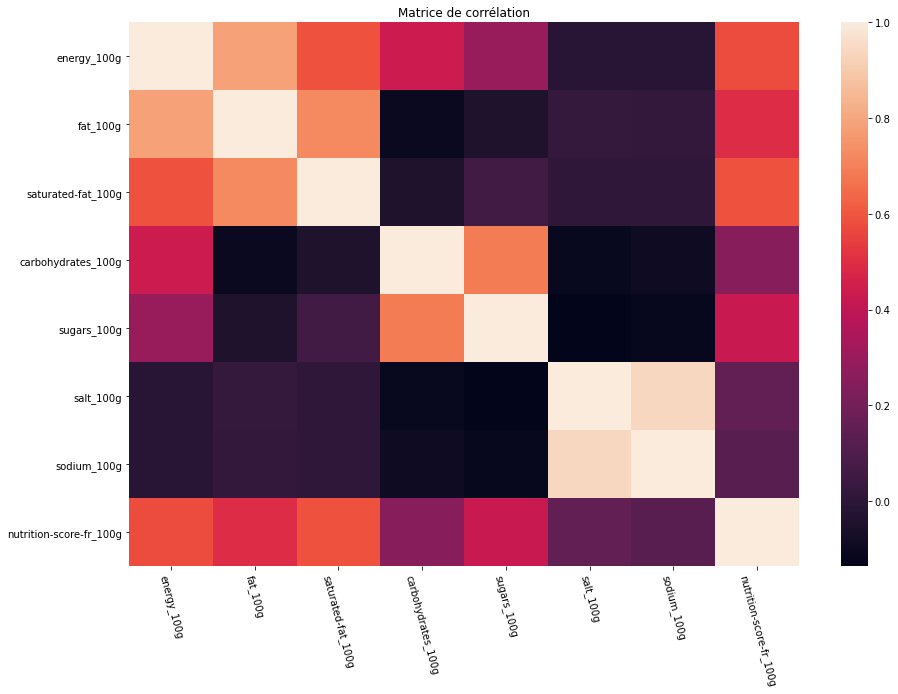

In [17]:
%matplotlib inline
plt.figure(figsize=(15,10))
corr = df[quants].corr()
sns.heatmap(corr).set_title("Matrice de corrélation")
plt.xticks(rotation=-75)

* ### Analyse par composantes principales
Il faut tout d'abord centrer et normer les données

In [18]:
from sklearn.preprocessing import StandardScaler
y = df['nutriscore_grade'].values
x = df[quants].values
x = StandardScaler().fit_transform(x)

In [19]:
pca = PCA()
components = pca.fit_transform(df[quants])

In [20]:
components.shape

(181777, 8)

In [21]:
xpvar = pca.explained_variance_ratio_

In [22]:
print("explained variance")
for i in range(len(quants)):
    print("Axe ", i+1," \t : ", xpvar[i]*100, " %")

explained variance
Axe  1  	 :  99.8206228636792  %
Axe  2  	 :  0.13358594765324974  %
Axe  3  	 :  0.02736354895097645  %
Axe  4  	 :  0.008018197667703224  %
Axe  5  	 :  0.005906970733746147  %
Axe  6  	 :  0.0033859749820990626  %
Axe  7  	 :  0.0010951748723142438  %
Axe  8  	 :  2.1321460714034636e-05  %


In [23]:
print(pca.components_.shape)

(8, 8)


In [24]:
for k in range(pca.components_.shape[0]):
    print("F",k+1)
    for i in range(len(quants)):
        print("\t",quants[i] ,"poids : \t",pca.components_[k][i])
    print()

F 1
	 energy_100g poids : 	 0.9996750907822973
	 fat_100g poids : 	 0.017464767360896975
	 saturated-fat_100g poids : 	 0.006202795338314003
	 carbohydrates_100g poids : 	 0.014705738143143823
	 sugars_100g poids : 	 0.006975002091044591
	 salt_100g poids : 	 -4.3238260467717864e-05
	 sodium_100g poids : 	 -2.0590858685602404e-05
	 nutrition-score-fr_100g poids : 	 0.0064271625458521406

F 2
	 energy_100g poids : 	 -0.009600848031181665
	 fat_100g poids : 	 -0.3040874006264585
	 saturated-fat_100g poids : 	 -0.09296377945176436
	 carbohydrates_100g poids : 	 0.8097501278548578
	 sugars_100g poids : 	 0.4924110574118312
	 salt_100g poids : 	 -0.011140182148791686
	 sodium_100g poids : 	 -0.004450946525298197
	 nutrition-score-fr_100g poids : 	 0.022103814188827373

F 3
	 energy_100g poids : 	 -0.008577372785570041
	 fat_100g poids : 	 0.2824691721980033
	 saturated-fat_100g poids : 	 0.21482078305792154
	 carbohydrates_100g poids : 	 -0.3633886071537367
	 sugars_100g poids : 	 0.7976897

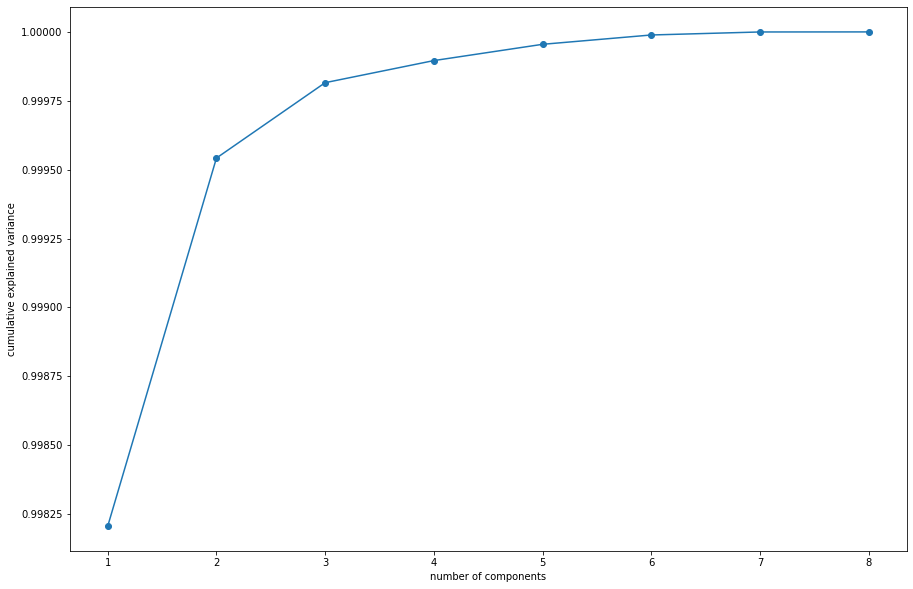

In [25]:
plt.figure(figsize=(15,10))
plt.scatter([i+1 for i in range(len(xpvar))],np.cumsum(pca.explained_variance_ratio_))
plt.plot([i+1 for i in range(len(xpvar))],np.cumsum(pca.explained_variance_ratio_))
plt.xticks([i+1 for i in range(len(xpvar))])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0, 0.5, 'cumulative explained variance')

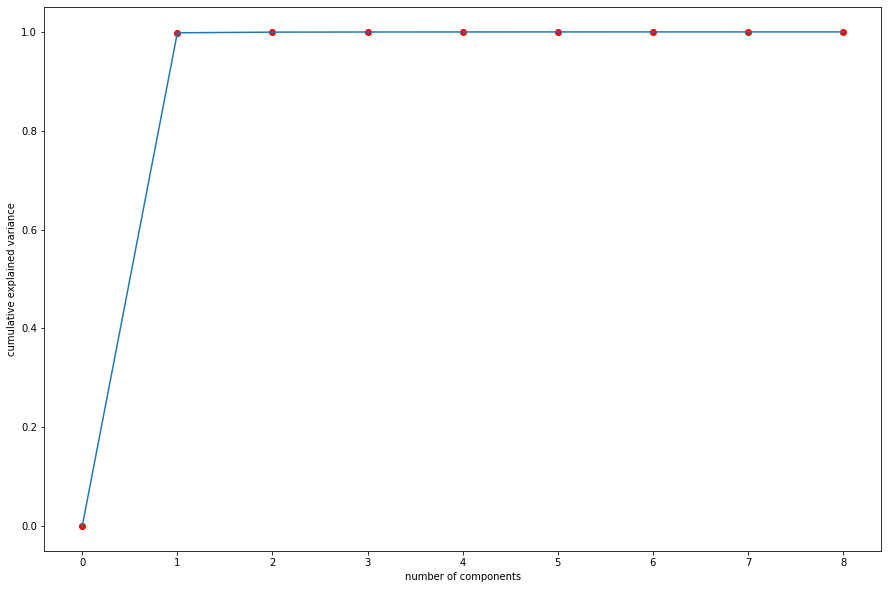

In [26]:
plt.figure(figsize=(15,10))
cumsum = [0]
for val in np.cumsum(pca.explained_variance_ratio_):
    cumsum.append(val)

bins = [i for i in range(len(cumsum))]
plt.scatter(bins,cumsum,color='red')
plt.plot(bins,cumsum)
plt.xticks(bins)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99820623, 0.99954209, 0.99981572, 0.99989591, 0.99995498,
       0.99998884, 0.99999979, 1.        ])

In [28]:
kaiser_c = 100/len(quants)
print("Critère de Kaiser : ",kaiser_c/100)

Critère de Kaiser :  0.125


In [29]:
xpvar < kaiser_c/100

array([False,  True,  True,  True,  True,  True,  True,  True])

In [30]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    plt.figure(figsize=(15,10))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

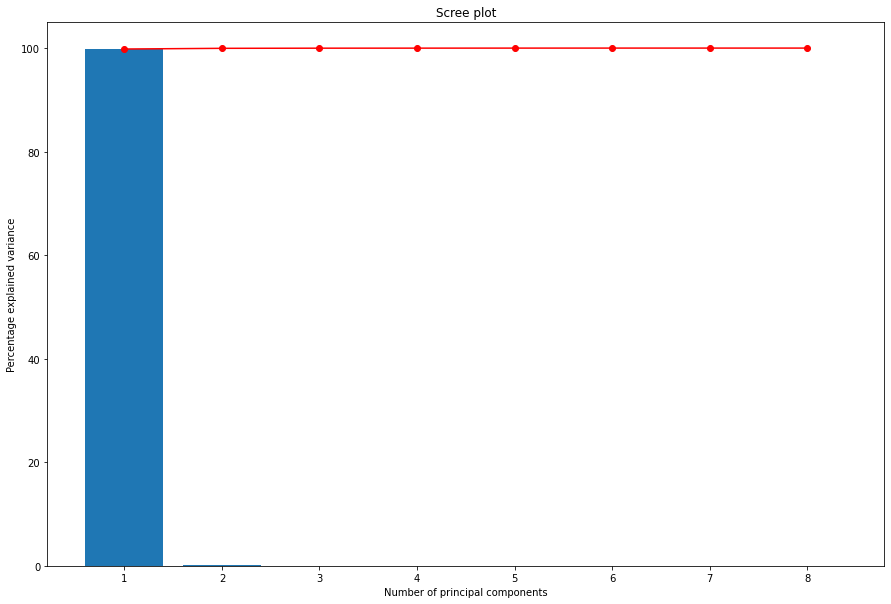

In [31]:
%matplotlib inline
display_scree_plot(pca)

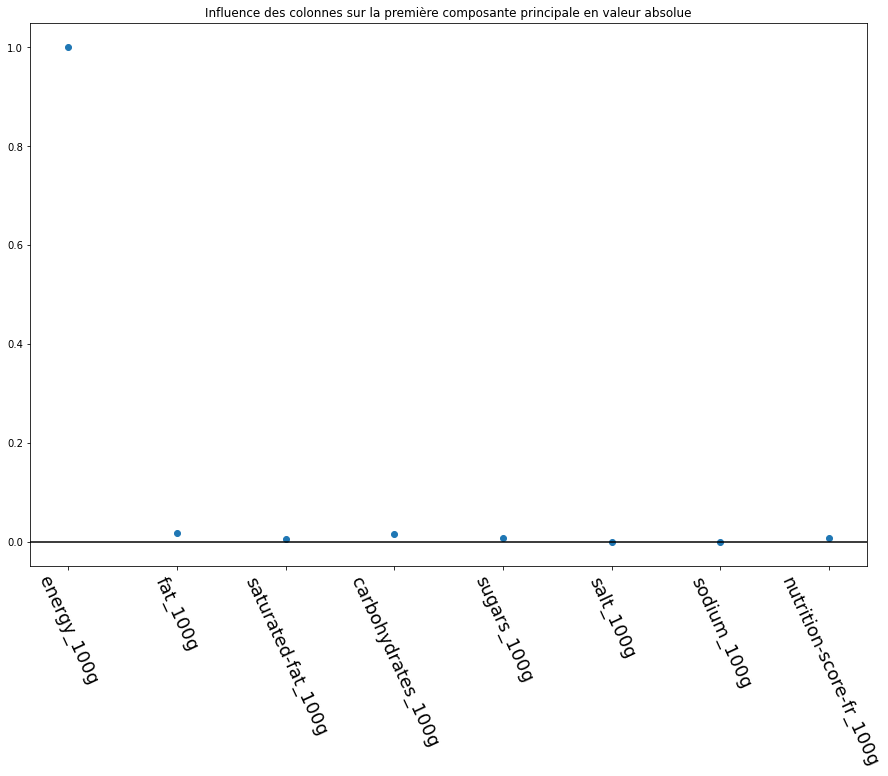

In [34]:
xtick = [i for i in range(len(pca.components_[0]))]

_,ax=plt.subplots(1,1,figsize=(15,10)) 
plt.title("Influence des colonnes sur la première composante principale en valeur absolue")
ax.scatter(xtick, np.abs(pca.components_[0]),)
# Set number of ticks for x-axis
ax.set_xticks(xtick)
# Set ticks labels for x-axis
ax.set_xticklabels(quants, rotation=-65, fontsize=18)
plt.axhline(0,color='black')

In [36]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""
    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(15,15))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

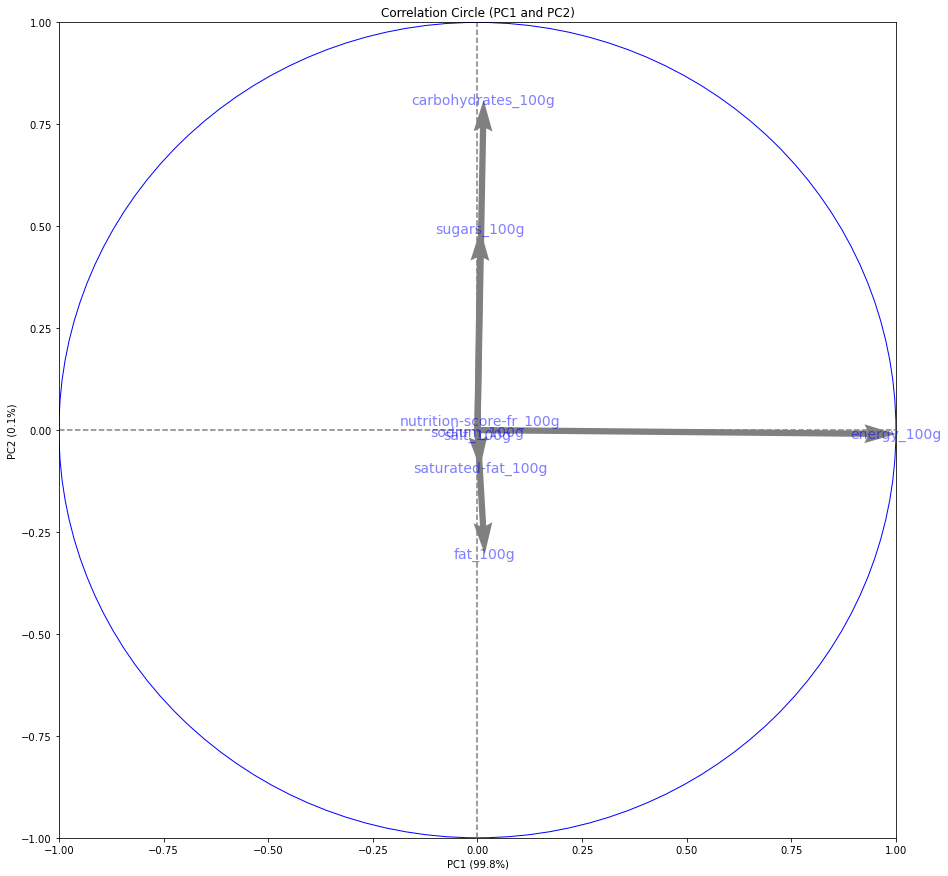

In [37]:

pcs = pca.components_
n_comp = len(quants)
features = quants
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [38]:
print('La première composante principale exprime plus de {} % de la variance, nous pourions réduire la dimension à 1 sans perdre trop d\'informations.'.format(100*(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])))

La première composante principale exprime plus de 99.95420881133245 % de la variance, nous pourions réduire la dimension à 1 sans perdre trop d'informations.


In [39]:
pca2 = PCA(n_components=1)
PC = pca2.fit_transform(x)

pcaDF = pd.DataFrame(data= PC, columns=['pc1'])
finalDf = pd.concat([pcaDF, df['nutriscore_grade']],axis=1)

In [40]:
finalDf

,pc1,nutriscore_grade
0,-0.757477,b
1,0.457585,e
2,0.969914,d
3,-0.174027,c
4,-0.456360,d
...,...,...
181772,-2.121401,a
181773,-2.306423,a
181774,-2.224962,c
181775,-0.592725,c


Il en ressort que <b>l'énergie joue un role primordial</b> dans la discrimination des produits dans le cadre de notre application. Et d'après les observations directes sur les <u>les gras saturés, les gras, les sucres ainsi que les carbohydrates, le sel, le sodium et le nutriscore sont fortement corrélés</u>. En effet dans le cadre de notre application il conviendrait de recommander à l'utilisateur des produits de la même catégorie que le produit de son choix mais contenant moins d'ingrédients "nocifs" et/ou avec un meilleur nutriscore. <u>Utiliser l'énergie sera pertinent lorsque des produits ne pourront pas être comparés parce qu'ils auraient le même nutriscore par exemple</u>.